In [170]:
import pandas as pd
import matplotlib.pyplot as plt 


In [171]:
columns = ["target dim","origin dim","base_err","target_err","batcharayya","sparsity"]
df = pd.read_csv("res_sparse_alinged_cords_with_bach.csv",header=None, names=columns)

In [172]:
df.tail()

,target dim,origin dim,base_err,target_err,batcharayya,sparsity
955,27.0,32.0,0.3156,0.34988,6.193921e+07,32.0
956,28.0,32.0,0.3156,0.34972,1.237275e+08,32.0
957,29.0,32.0,0.3156,0.32970,2.415684e+08,32.0
958,30.0,32.0,0.3156,0.32998,4.828816e+08,32.0
959,31.0,32.0,0.3156,0.32730,9.599328e+08,32.0


In [173]:
df["t/d"] = df["target dim"] / df["origin dim"]

In [174]:
df.head()

,target dim,origin dim,base_err,target_err,batcharayya,sparsity,t/d
0,2.0,32.0,0.46508,0.46526,2.304662e-04,1.0,0.06250
1,3.0,32.0,0.46508,0.46530,2.368563e-07,1.0,0.09375
2,4.0,32.0,0.46508,0.46548,2.369535e-10,1.0,0.12500
3,5.0,32.0,0.46508,0.46538,2.416372e-13,1.0,0.15625
4,6.0,32.0,0.46508,0.46510,2.451951e-16,1.0,0.18750


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target dim   960 non-null    float64
 1   origin dim   960 non-null    float64
 2   base_err     960 non-null    float64
 3   target_err   960 non-null    float64
 4   batcharayya  960 non-null    float64
 5   sparsity     960 non-null    float64
 6   t/d          960 non-null    float64
dtypes: float64(7)
memory usage: 52.6 KB


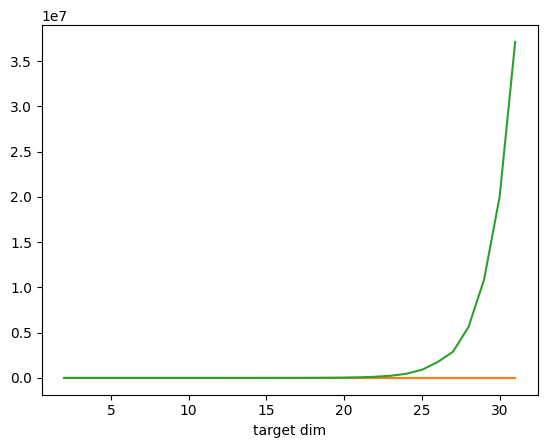

In [176]:
df.groupby("target dim").mean()["target_err"].plot()
df.groupby("target dim").mean()["base_err"].plot()
df.groupby("target dim").mean()["batcharayya"].plot()
plt.show()

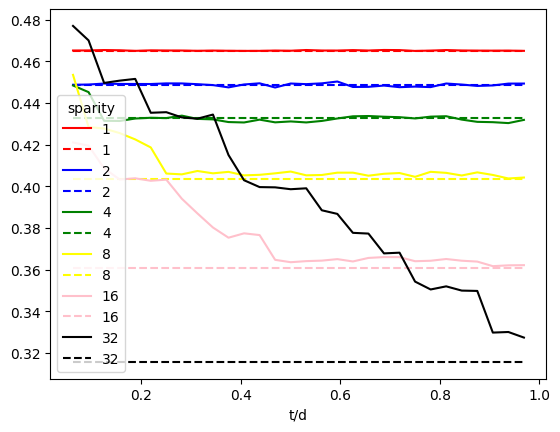

In [177]:
colors = ["red","blue", "green","yellow","pink","black"]
i =0 
fig, ax = plt.subplots()
for s in [1,2,4,8,16,32]:
    df[df["sparsity"] == s].groupby("t/d").mean()["target_err"].plot(c=colors[i],label= s)
    df[df["sparsity"] == s].groupby("t/d").mean()["base_err"].plot(c=colors[i],label= s,linestyle="dashed")
    i+= 1

plt.legend(loc='best',title="sparity")
plt.show()

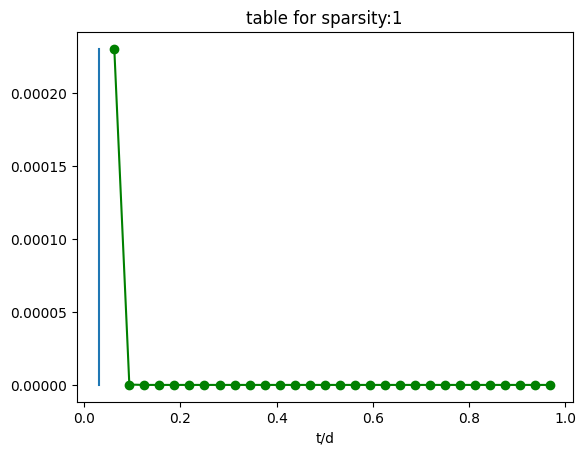

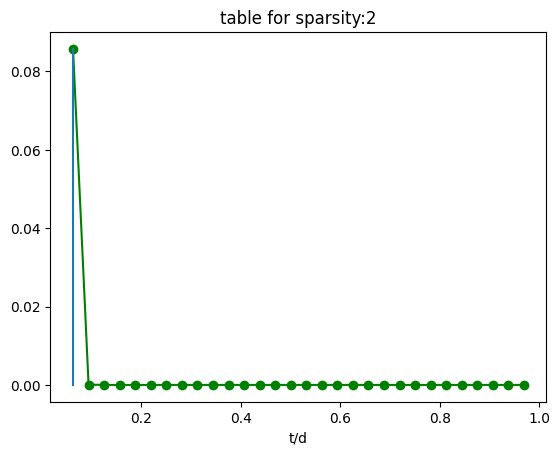

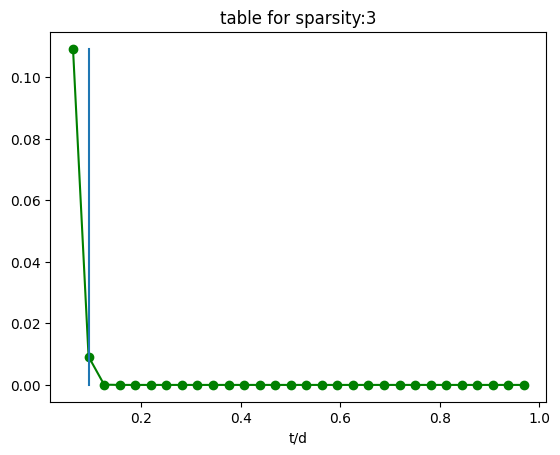

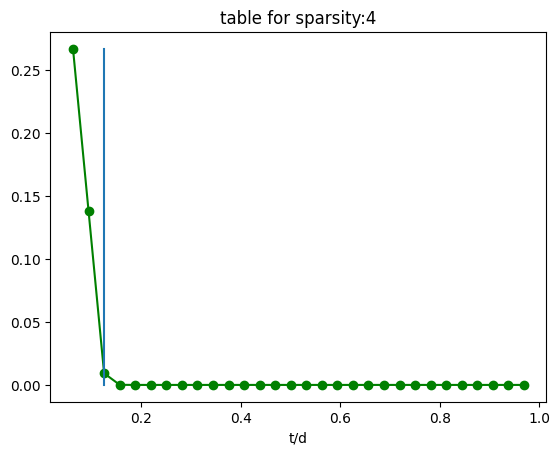

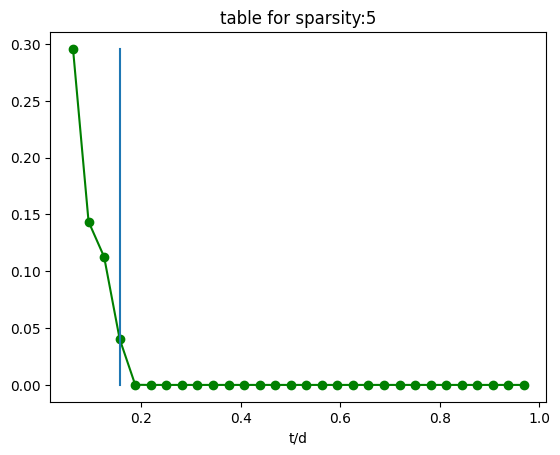

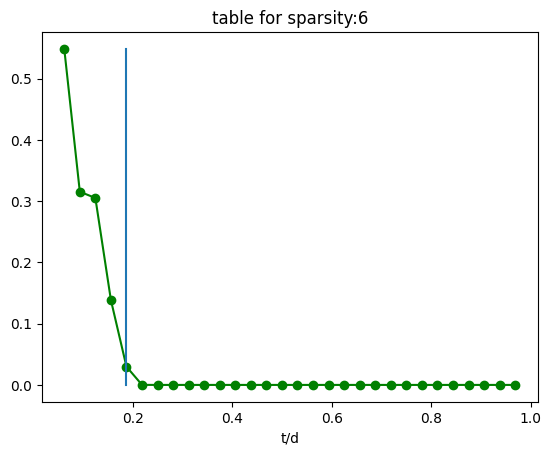

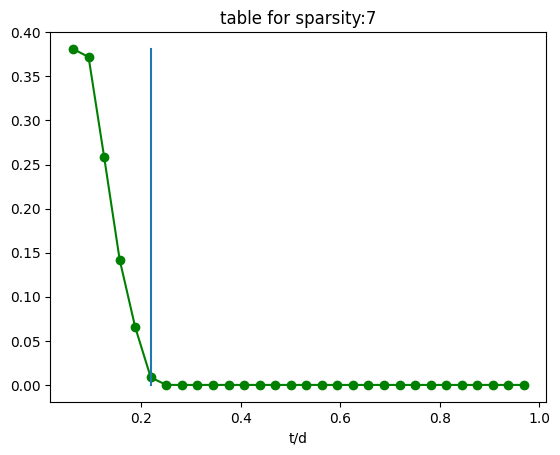

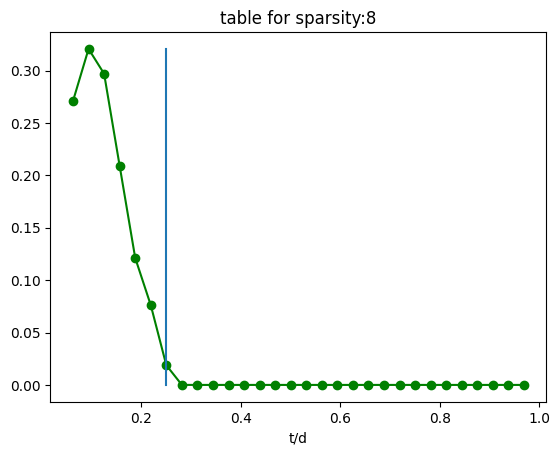

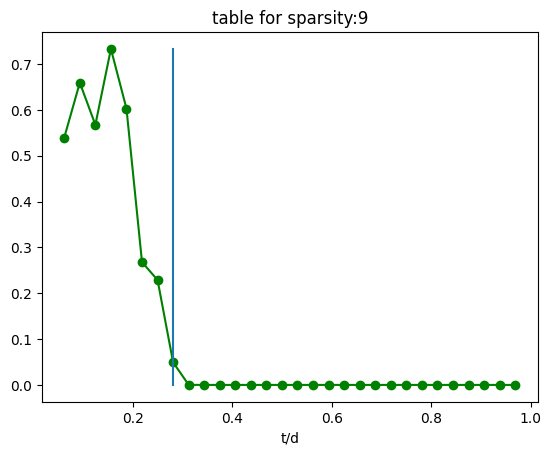

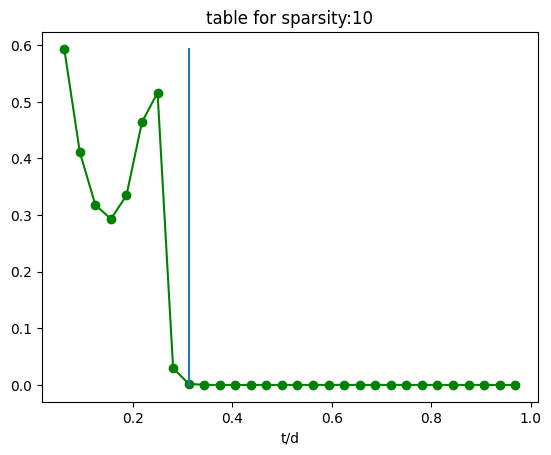

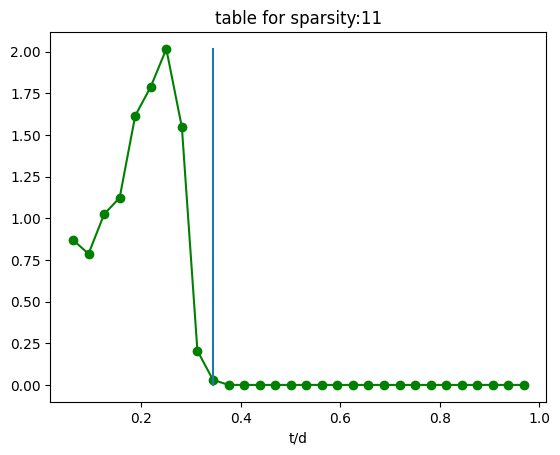

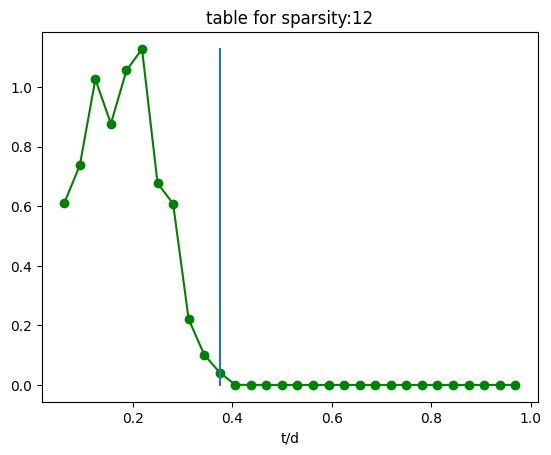

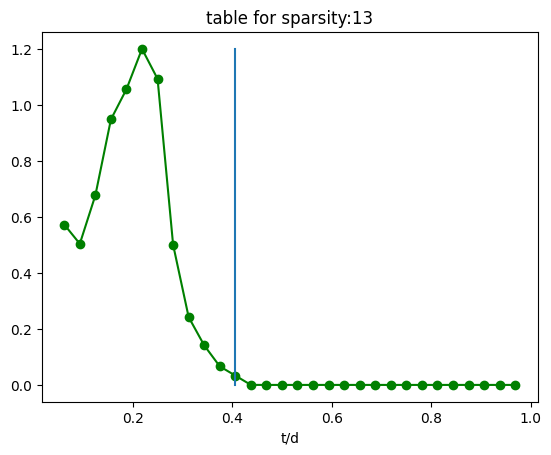

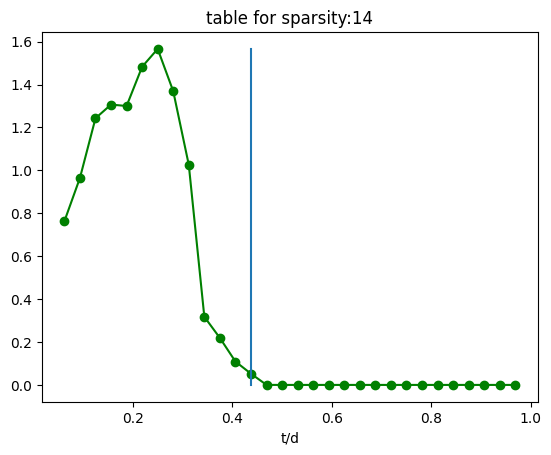

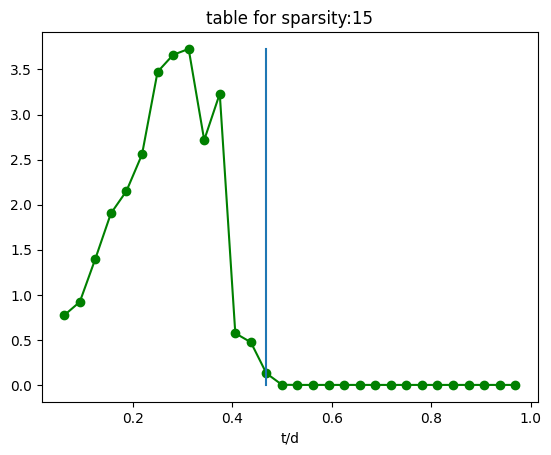

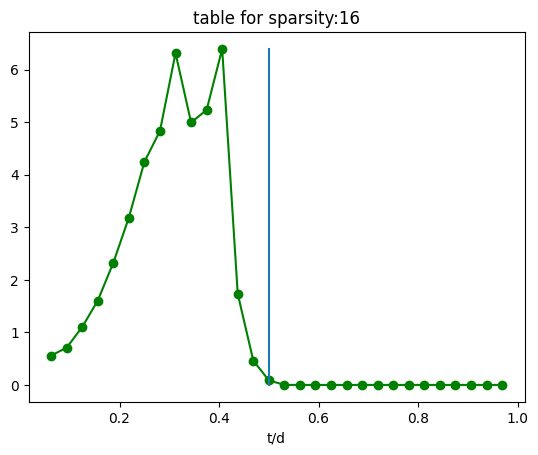

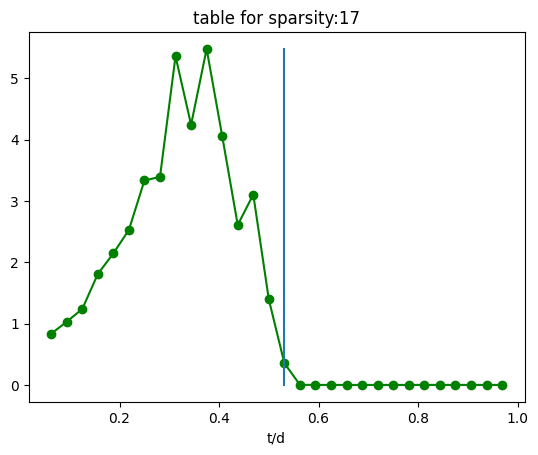

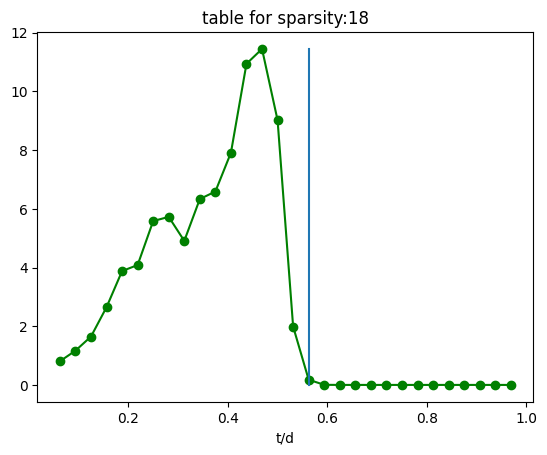

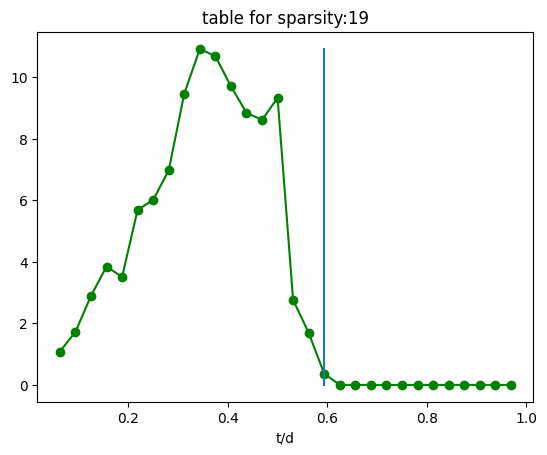

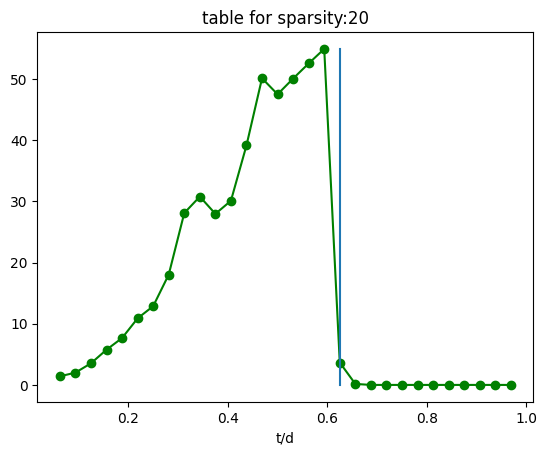

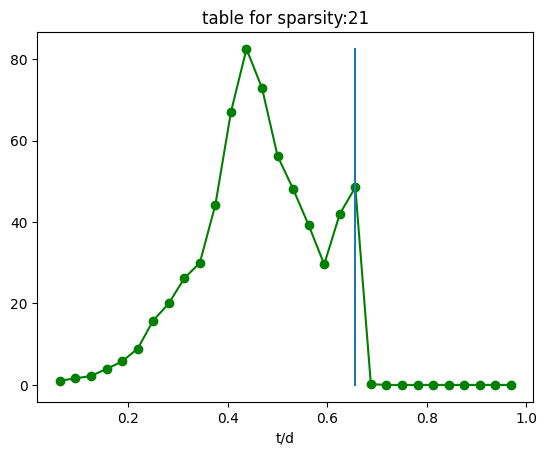

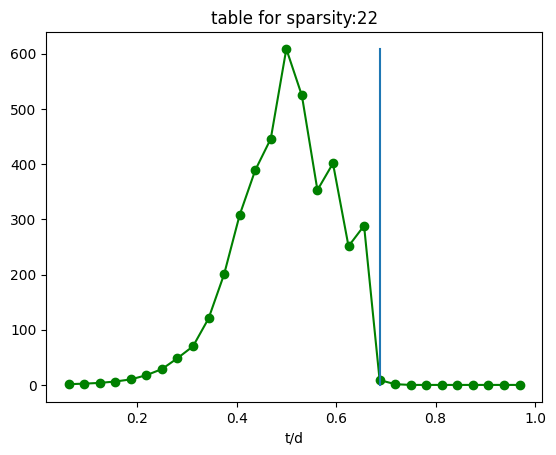

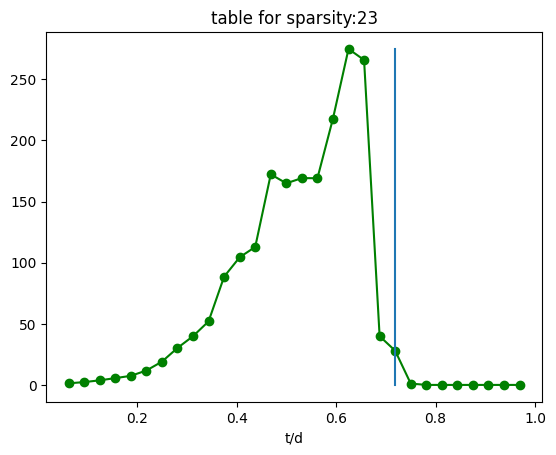

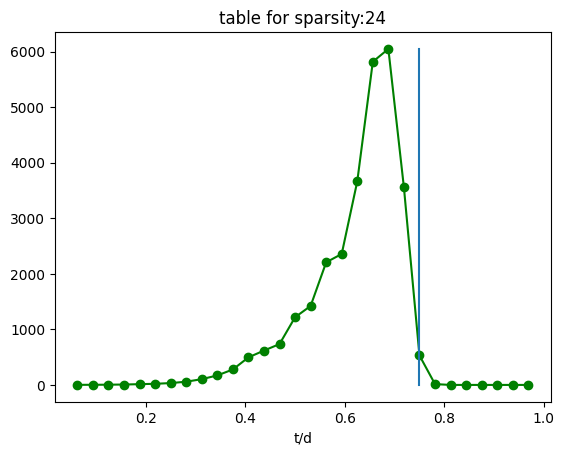

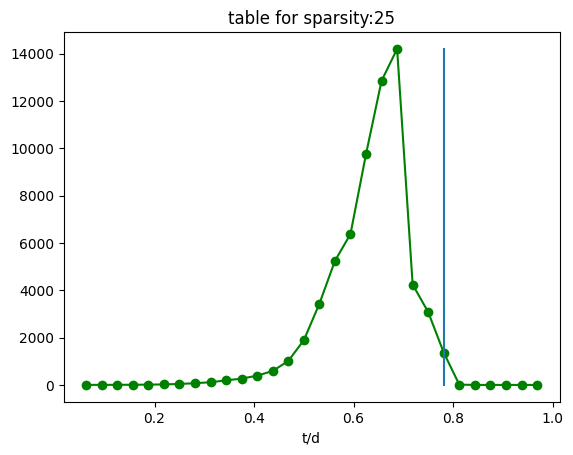

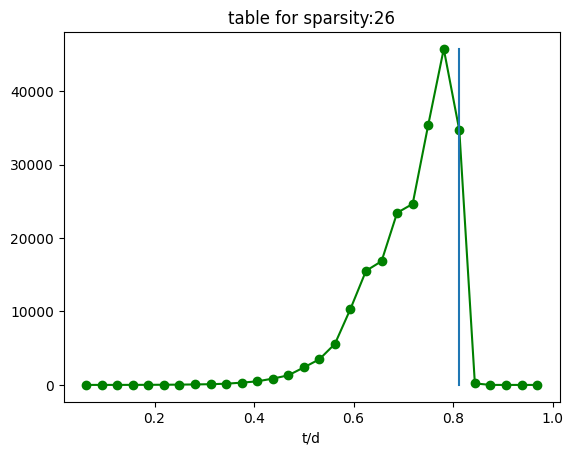

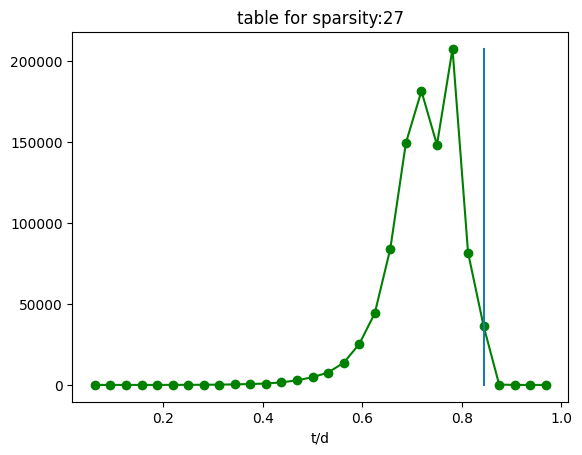

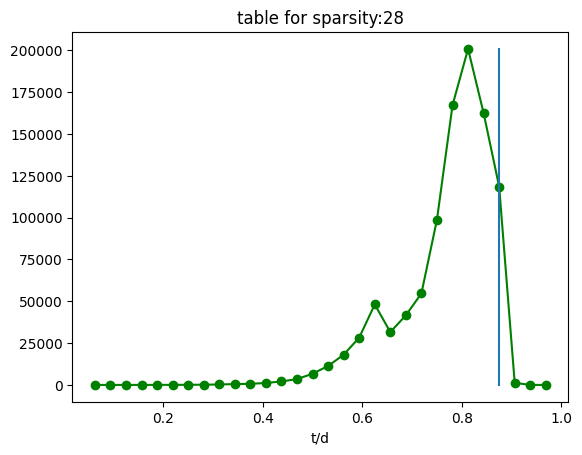

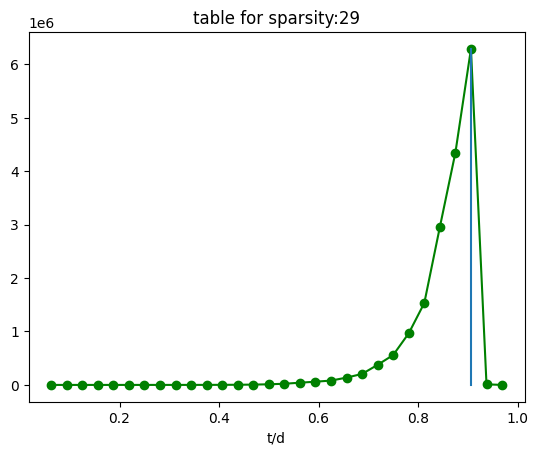

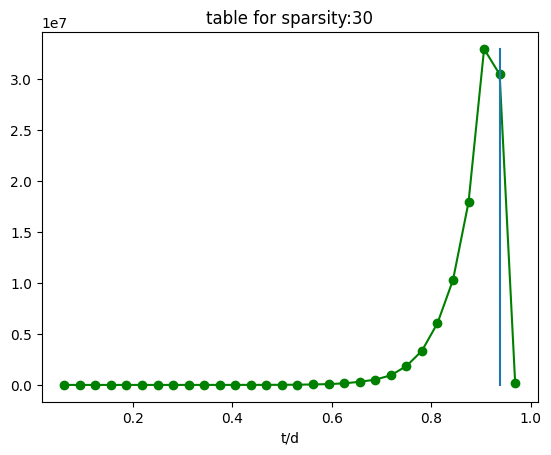

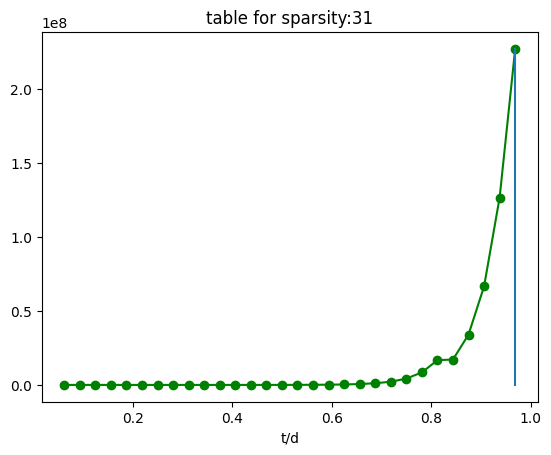

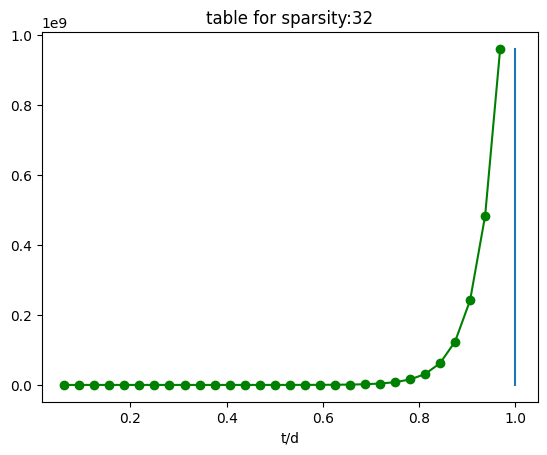

In [179]:
i =0 
fig, ax = plt.subplots()
for s in range(1,33):
    plt.title(f"table for sparsity:{s}")
    # df[df["sparsity"] == s].groupby("t/d").mean()["target_err"].plot(c=colors[0],label="target err")
    # df[df["sparsity"] == s].groupby("t/d").mean()["base_err"].plot(c=colors[1],label= "base err")
    df[df["sparsity"] == s].groupby("t/d").mean()["batcharayya"].plot(c=colors[2],marker="o",label= "batcharayya bound")
    plt.plot([s/32,s/32],[0,df[df["sparsity"] == s].groupby("t/d").mean()["batcharayya"].max()])
    plt.show()